# Generate SED (good quality) Sample

Filter out SNe candidates that have good ZTF and WISE coverage on the tail to generate good quality ($\geq$ 4 data points) SEDs for tail and nickel mass analysis. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import re
import corner

from lltypeiip.config import config
from lltypeiip.photometry import get_wise_lc_data, get_ztf_lc_data, convert_ZTF_mag_mJy, plot_combined_lc
from lltypeiip.sed import build_multi_epoch_seds_from_tail, plot_sed
from lltypeiip.dusty import fit_grid_to_sed, plot_best_fit_dusty_model

from alerce.core import Alerce

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
params_df = pd.read_csv(config.paths.params, index_col=0)
print("Params Table unique SN oids: ", params_df.index.unique().shape[0])

Params Table unique SN oids:  132


In [4]:
wise_dir = Path(config.paths.wise_dir)
pattern = re.compile(r"lightcurve_(ZTF\d+[a-z]+)_")

oids = list(params_df.index.unique())

found_oids = set()

found_oids = {f.name.split("_")[1] for f in wise_dir.glob("lightcurve_*.json")}

oids_present = sorted(set(oids) & found_oids)
oids_missing = sorted(set(oids) - found_oids)

print(f"Found {len(oids_present)} / {len(oids)} OIDs with WISE data\n")

# print("Present:")
# for o in oids_present:
#     print(" ", o)

print("Missing:")
missing_str = ""
for o in oids_missing:
    missing_str += f"{o}, "
print(missing_str)

Found 108 / 132 OIDs with WISE data

Missing:
ZTF18aatyqds, ZTF18aawpwlf, ZTF18aaxkqgy, ZTF18adbacau, ZTF19aakiyfn, ZTF19aakzash, ZTF19aamggnw, ZTF19aamhmsx, ZTF19aanlekq, ZTF19aaqdkrm, ZTF19aauqwna, ZTF19aazfvhh, ZTF19acbvisk, ZTF19acifduk, ZTF20aapchqy, ZTF20abeohfn, ZTF20acmaaan, ZTF20acuhren, ZTF21aaeqwov, ZTF22abtjefa, ZTF24aaejecr, ZTF24aaucrua, ZTF24abmkros, ZTF24abtczty, 


In [8]:
oids = oids_present
best_sed_by_oid = {}

has_seds = []

alerce = Alerce() # client

for oid in oids:
    print(f"\nProcessing {oid}...")

    wise_resdict = get_wise_lc_data(oid)
    ztf_resdict = get_ztf_lc_data(oid, alerce, doLC=False, doStamps=False, add_forced=True)
    ztf_resdict = convert_ZTF_mag_mJy(ztf_resdict, forced=True)

    seds = build_multi_epoch_seds_from_tail(
        ztf_resdict, wise_resdict, 
        min_detected_bands=4,
        require_wise_detection=True,
        max_dt_ztf=5.0,
        max_dt_wise=5.0
    )
    if len(seds) > 0:
        print(f"  Found {len(seds)} SED tail epochs with WISE detections for {oid}:")
        print("\n".join(
            [f"  MJD {sed['mjd']:.2f}, bands: {list(sed['bands'])}" for sed in seds]
        ))
        has_seds.append(oid)
        best = max(seds, key=lambda sed: (len(sed["bands"]), sed["mjd"]))
        best_sed_by_oid[oid] = best
       
print(f"\nFound {len(has_seds)} / {len(oids)} OIDs with SED tails and WISE detections.")


Processing ZTF18aaszvfn...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF18aaszvfn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF18abjndhh...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF18abjndhh to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF18abjndhh:
  MJD 58434.36, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF18abzrgim...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF18abzrgim to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aadnxnl...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aadnxnl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF19aadnxnl:
  MJD 58631.44, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF19aailepg...
Saved ztf_resdict for ZTF19aailepg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aamwhat...
Saved ztf_resdict for ZTF19aamwhat to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aanhhal...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aanhhal to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aaniore...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aaniore to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aanrrqu...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aanrrqu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF19aanrrqu:
  MJD 58629.83, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF19aapafit...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aapafit to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF19aapafit:
  MJD 58685.57, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF19aarykkb...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aarykkb to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF19aarykkb:
  MJD 58715.23, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF19aawgxdn...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aawgxdn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aazudta...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aazudta to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aazyvub...
Saved ztf_resdict for ZTF19aazyvub to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19abajxet...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19abajxet to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19abbnamr...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19abbnamr to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19abbwfgp...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19abbwfgp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19abqrhvt...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19abqrhvt to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19abqrhvy...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19abqrhvy to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19abwztsb...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19abwztsb to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19acbwejj...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19acbwejj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF19acbwejj:
  MJD 59025.65, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF19acewuwn...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19acewuwn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19acftfav...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19acftfav to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19aclobbu...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aclobbu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF19aclobbu:
  MJD 59072.79, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF19acrcxri...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19acrcxri to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19actnwtn...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19actnwtn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19actnyae...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19actnyae to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF19acytcsg...
Saved ztf_resdict for ZTF19acytcsg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aaagypx...
Saved ztf_resdict for ZTF21aaagypx to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aabygea...
Saved ztf_resdict for ZTF21aabygea to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aafepon...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aafepon to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aafkwtk...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aafkwtk to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aagtqna...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aagtqna to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF21aagtqna:
  MJD 59458.55, bands: ['ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF21aaipypa...
Saved ztf_resdict for ZTF21aaipypa to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aakvroo...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aakvroo to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aantsla...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aantsla to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aanzcuj...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aanzcuj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aaobkmg...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aaobkmg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aapkcmr...
Saved ztf_resdict for ZTF21aapkcmr to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aapliyn...
Saved ztf_resdict for ZTF21aapliyn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aaqugxm...
Saved ztf_resdict for ZTF21aaqugxm to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21aavhnpk...
Saved ztf_resdict for ZTF21aavhnpk to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21abfiuqf...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21abfiuqf to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21abgilzj...
Saved ztf_resdict for ZTF21abgilzj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21abhhrpj...
Saved ztf_resdict for ZTF21abhhrpj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21abjcjmc...
Saved ztf_resdict for ZTF21abjcjmc to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21ablvzhp...
Saved ztf_resdict for ZTF21ablvzhp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF21ablvzhp:
  MJD 59524.61, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF21abnlhxs...
Saved ztf_resdict for ZTF21abnlhxs to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF21abnlhxs:
  MJD 59541.66, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1']

Processing ZTF21abnudtb...
Saved ztf_resdict for ZTF21abnudtb to /

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21abvcxel to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21acafqtj...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21acafqtj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21acgrrnl...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21acgrrnl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21acgunkr...
Saved ztf_resdict for ZTF21acgunkr to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF21acpqqgu...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21acpqqgu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF21acpqqgu:
  MJD 59690.20, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1']

Processing ZTF22aafsqud...
Saved ztf_resdict for ZTF22aafsqud to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aakdbia...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22aakdbia to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aakdqqg...
Saved ztf_resdict for ZTF22aakdqqg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aaolwsd...
Saved ztf_resdict for ZTF22aaolwsd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aapargp...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22aapargp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aarycqo...
Saved ztf_resdict for ZTF22aarycqo to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aasojye...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22aasojye to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aativsd...
Saved ztf_resdict for ZTF22aativsd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF22aativsd:
  MJD 59910.55, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF22aavbfhz...
Saved ztf_resdict for ZTF22aavbfhz to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aavobvq...
Saved ztf_resdict for ZTF22aavobvq to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22aaywnyg...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22aaywnyg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF22aaywnyg:
  MJD 59908.45, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF22aazmrpx...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22aazmrpx to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abfavpu...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abfavpu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abfwxtr...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abfwxtr to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abfxkdm...
Saved ztf_resdict for ZTF22abfxkdm to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abhsxph...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abhsxph to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abkbjsb...
Saved ztf_resdict for ZTF22abkbjsb to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abkhrkd...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abkhrkd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abnujbv...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abnujbv to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22absqhkw...
Saved ztf_resdict for ZTF22absqhkw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abssiet...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abssiet to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abtspsw...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abtspsw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF22abtspsw:
  MJD 60049.87, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF22abyivoq...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abyivoq to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abyohff...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abyohff to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abyokkf...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abyokkf to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF22abzqwmp...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abzqwmp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aaaatjn...
Saved ztf_resdict for ZTF23aaaatjn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aackjhs...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23aackjhs to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aailjjs...
Saved ztf_resdict for ZTF23aailjjs to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aanymcl...
Saved ztf_resdict for ZTF23aanymcl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF23aanymcl:
  MJD 60177.76, bands: ['ZTF_g', 'ZTF_r', 'W1', 'W2']

Processing ZTF23aaphnyz...
Saved ztf_resdict for ZTF23aaphnyz to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aaqknaw...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23aaqknaw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aasbvab...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23aasbvab to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aasrcyv...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23aasrcyv to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23aaxadel...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23aaxadel to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF23aaxadel:
  MJD 60294.86, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF23abascqa...
Saved ztf_resdict for ZTF23abascqa to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23abaxtlq...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23abaxtlq to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF23abaxtlq:
  MJD 60329.67, bands: ['ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF23abbtkrv...
Saved ztf_resdict for ZTF23abbtkrv to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23abhzfww...
Saved ztf_resdict for ZTF23abhzfww to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23abmoxlu...
Saved ztf_resdict for ZTF23abmoxlu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF23abnogui...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23abnogui to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF23abnogui:
  MJD 60403.25, bands: ['ZTF_g', 'ZTF_r', 'ZTF_i', 'W1', 'W2']

Processing ZTF24aaabbse...
Saved ztf_resdict for ZTF24aaabbse to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aabppgn...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF24aabppgn to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aabpzuz...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF24aabpzuz to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aabsmvc...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF24aabsmvc to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aadkwni...
Saved ztf_resdict for ZTF24aadkwni to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aaemydm...
Saved ztf_resdict for ZTF24aaemydm to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce
  Found 1 SED tail epochs with WISE detections for ZTF24aaemydm:
  MJD 60436.33, bands: ['ZTF_g', 'ZTF_i', 'W1', 'W2']

Processing ZTF24aafqzur...


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF24aafqzur to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aagupsf...
Saved ztf_resdict for ZTF24aagupsf to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aajxppf...
Saved ztf_resdict for ZTF24aajxppf to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aaplfjd...
Saved ztf_resdict for ZTF24aaplfjd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Processing ZTF24aarvbxj...
Saved ztf_resdict for ZTF24aarvbxj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

Found 20 / 108 OIDs with SED tails and WISE detections.


In [9]:
print(f"Found {len(has_seds)} / {len(oids)} OIDs with SED tails and WISE detections.")

Found 20 / 108 OIDs with SED tails and WISE detections.


In [13]:
best_sed_by_oid.keys()

dict_keys(['ZTF18abjndhh', 'ZTF19aadnxnl', 'ZTF19aanrrqu', 'ZTF19aapafit', 'ZTF19aarykkb', 'ZTF19acbwejj', 'ZTF19aclobbu', 'ZTF21aagtqna', 'ZTF21ablvzhp', 'ZTF21abnlhxs', 'ZTF21abouuat', 'ZTF21acpqqgu', 'ZTF22aativsd', 'ZTF22aaywnyg', 'ZTF22abtspsw', 'ZTF23aanymcl', 'ZTF23aaxadel', 'ZTF23abaxtlq', 'ZTF23abnogui', 'ZTF24aaemydm'])

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF18abjndhh to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58434.36
  ZTF_g: Δt=+0.16 d
  ZTF_r: Δt=+0.09 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF18abjndhh_cand_sed.png


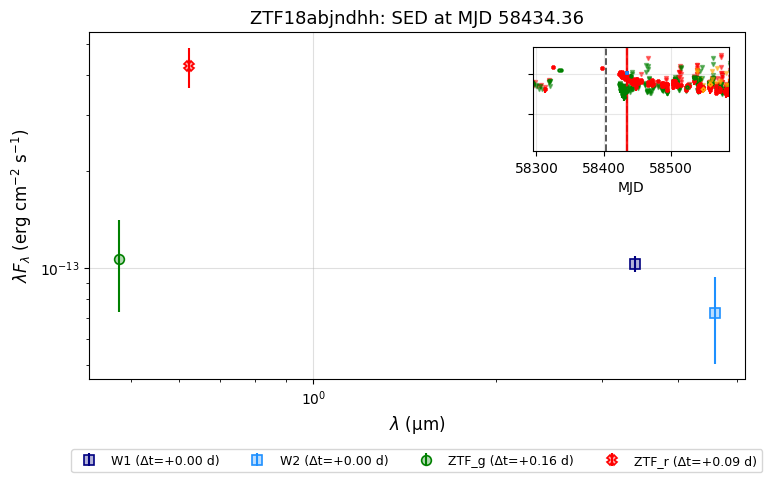

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF19aadnxnl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58631.44
  ZTF_g: Δt=-3.22 d
  ZTF_r: Δt=+0.83 d
  ZTF_i: Δt=-4.01 d
  W1: Δt=-0.03 d
  W2: Δt=+0.03 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF19aadnxnl_cand_sed.png


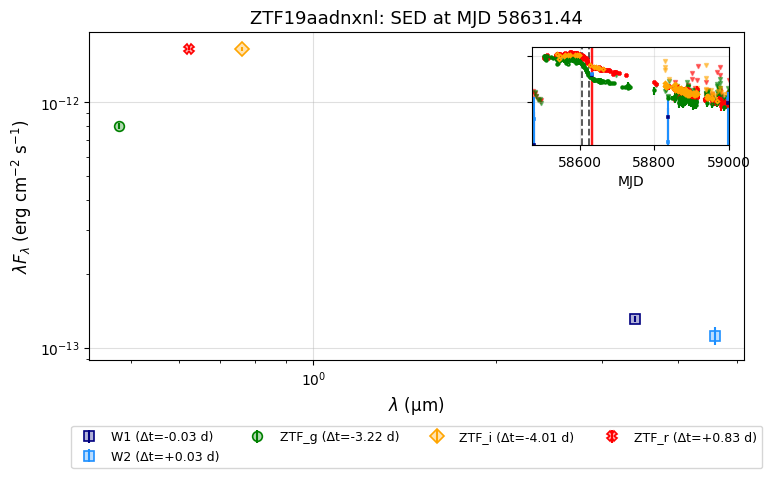

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF19aanrrqu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58629.83
  ZTF_g: Δt=-1.64 d
  ZTF_r: Δt=+2.35 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF19aanrrqu_cand_sed.png


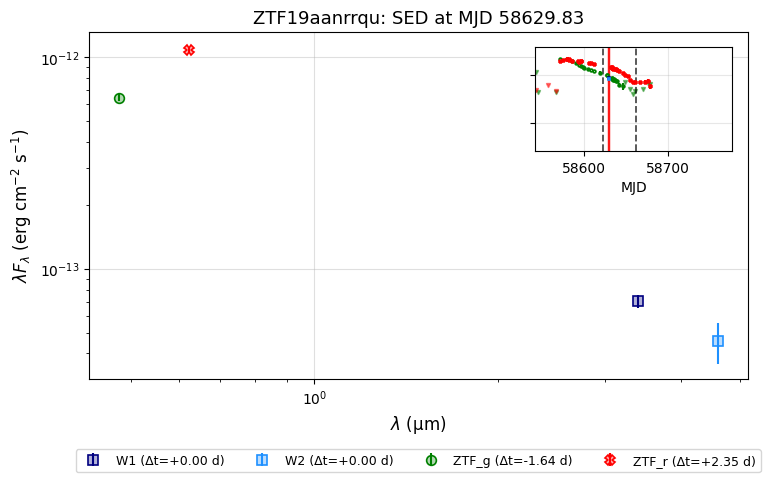

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF19aapafit to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58685.57
  ZTF_g: Δt=-0.40 d
  ZTF_r: Δt=-0.25 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF19aapafit_cand_sed.png


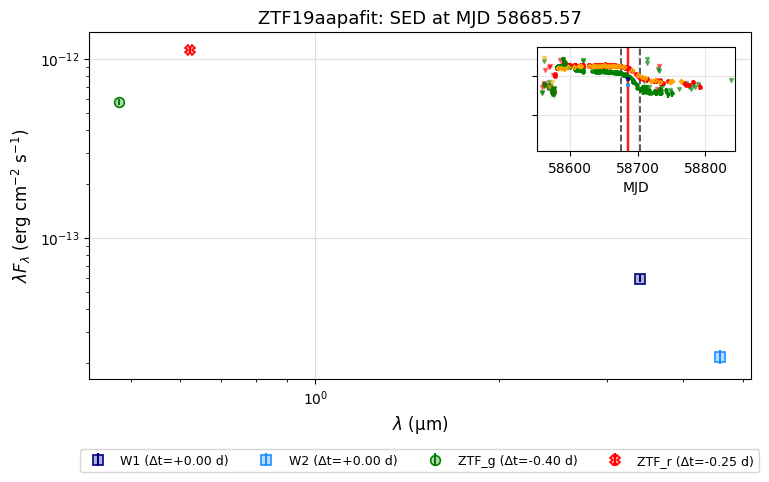

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF19aarykkb to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58715.23
  ZTF_g: Δt=+2.94 d
  ZTF_r: Δt=-1.08 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF19aarykkb_cand_sed.png


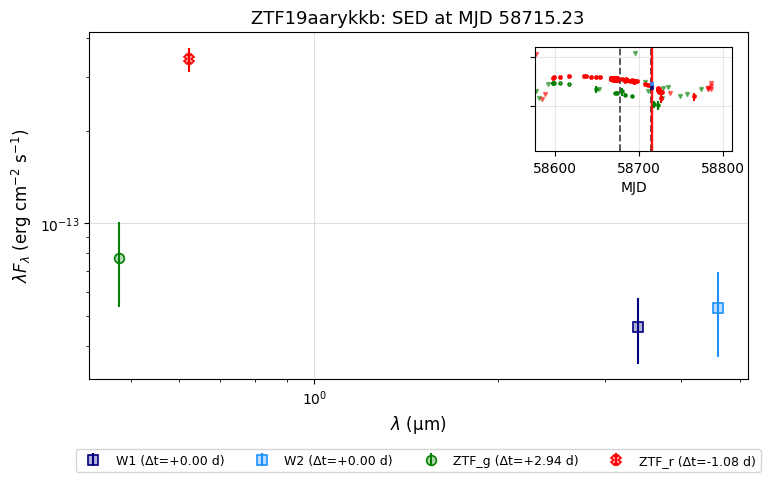

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF19acbwejj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59025.65
  ZTF_g: Δt=-1.38 d
  ZTF_r: Δt=-1.42 d
  ZTF_i: Δt=-3.38 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF19acbwejj_cand_sed.png


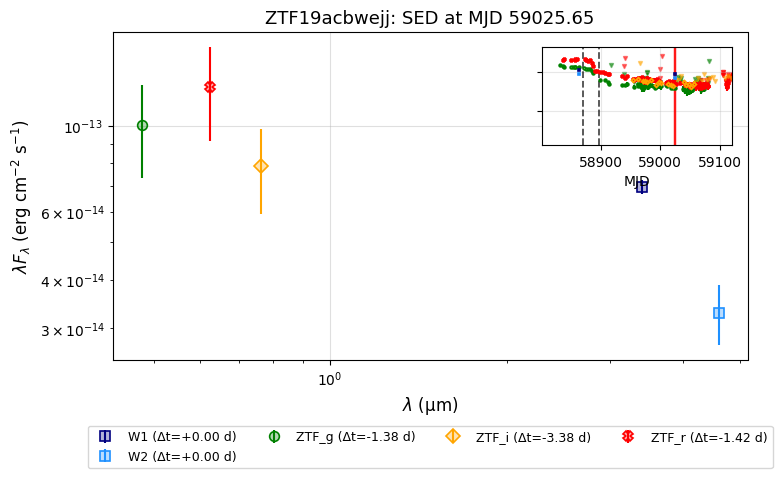

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF19aclobbu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59072.79
  ZTF_g: Δt=+2.62 d
  ZTF_r: Δt=-0.29 d
  W1: Δt=-0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF19aclobbu_cand_sed.png


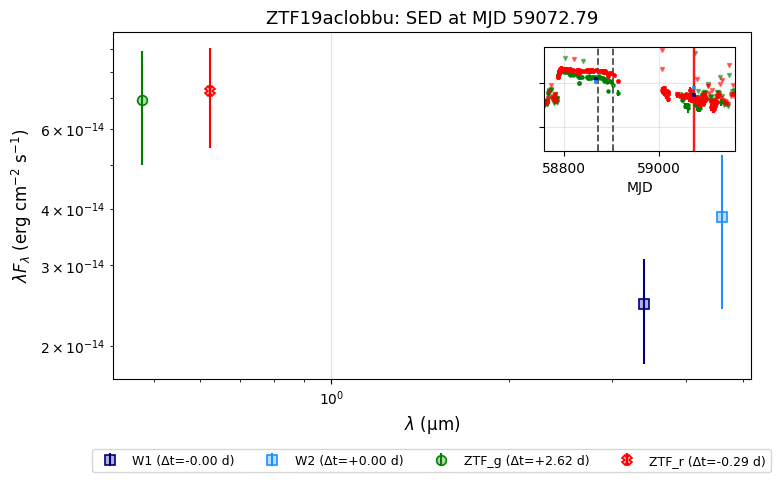

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF21aagtqna to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59458.55
  ZTF_r: Δt=-0.32 d
  ZTF_i: Δt=+1.61 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF21aagtqna_cand_sed.png


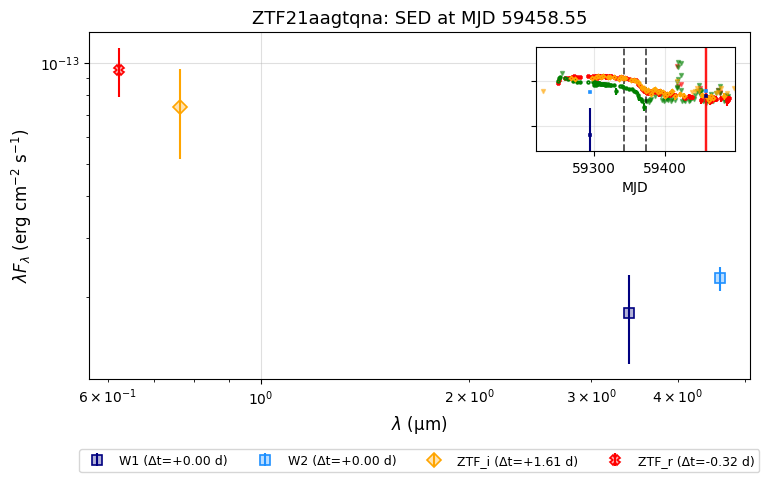

Saved ztf_resdict for ZTF21ablvzhp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59524.61
  ZTF_g: Δt=+0.60 d
  ZTF_r: Δt=+0.56 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF21ablvzhp_cand_sed.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


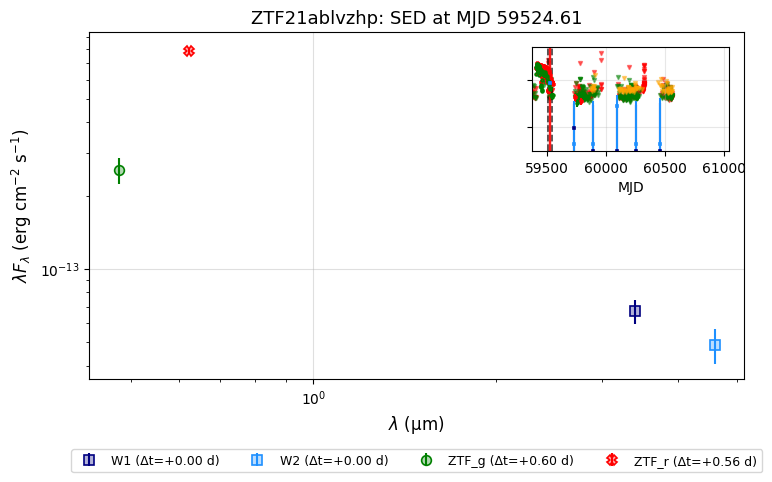

Saved ztf_resdict for ZTF21abnlhxs to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59541.66
  ZTF_g: Δt=+0.46 d
  ZTF_r: Δt=+0.50 d
  ZTF_i: Δt=-3.52 d
  W1: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF21abnlhxs_cand_sed.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


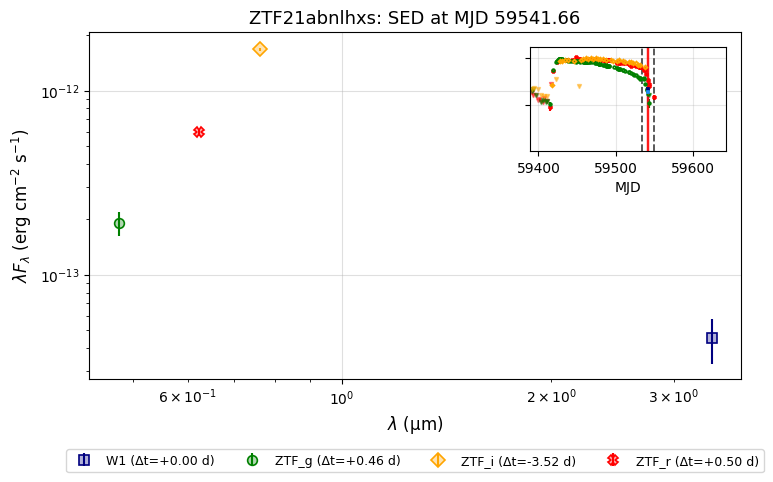

Saved ztf_resdict for ZTF21abouuat to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59554.90
  ZTF_g: Δt=-4.72 d
  ZTF_r: Δt=-4.78 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF21abouuat_cand_sed.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


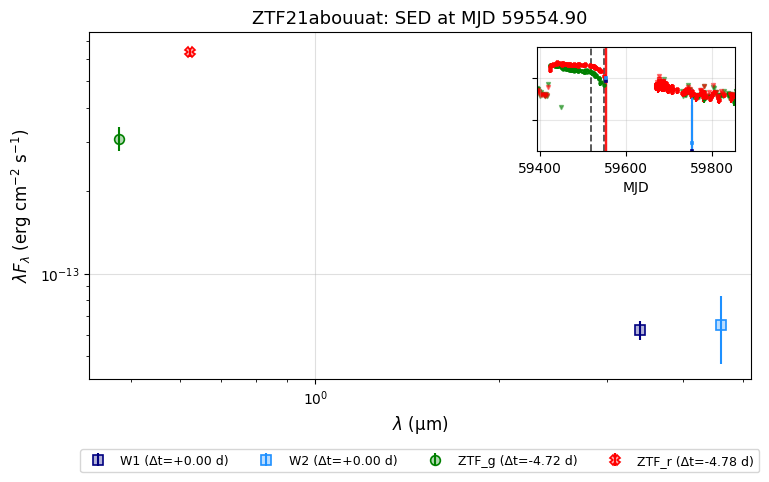

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF21acpqqgu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59690.20
  ZTF_g: Δt=-3.02 d
  ZTF_r: Δt=+3.00 d
  ZTF_i: Δt=+4.00 d
  W1: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF21acpqqgu_cand_sed.png


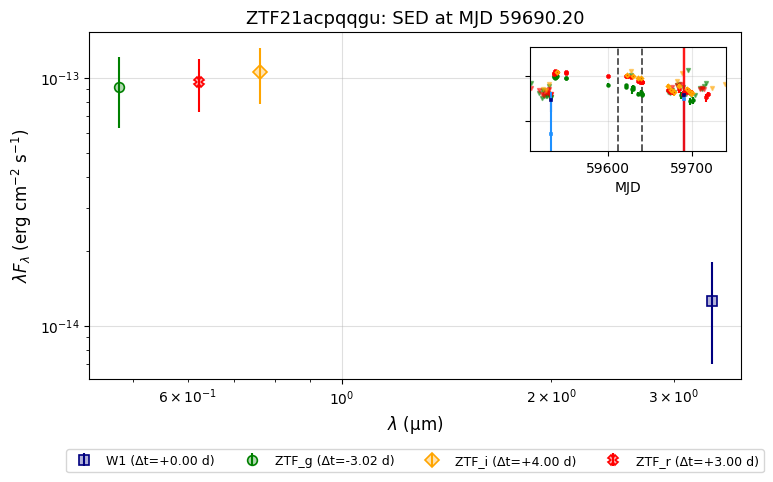

Saved ztf_resdict for ZTF22aativsd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59910.55
  ZTF_g: Δt=-0.41 d
  ZTF_r: Δt=-0.38 d
  ZTF_i: Δt=+3.57 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF22aativsd_cand_sed.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


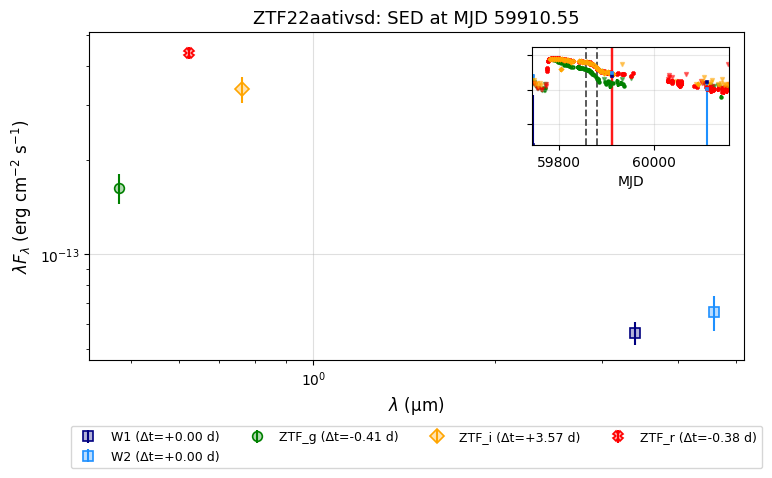

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF22aaywnyg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59908.45
  ZTF_g: Δt=+1.04 d
  ZTF_r: Δt=+1.00 d
  ZTF_i: Δt=-2.97 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF22aaywnyg_cand_sed.png


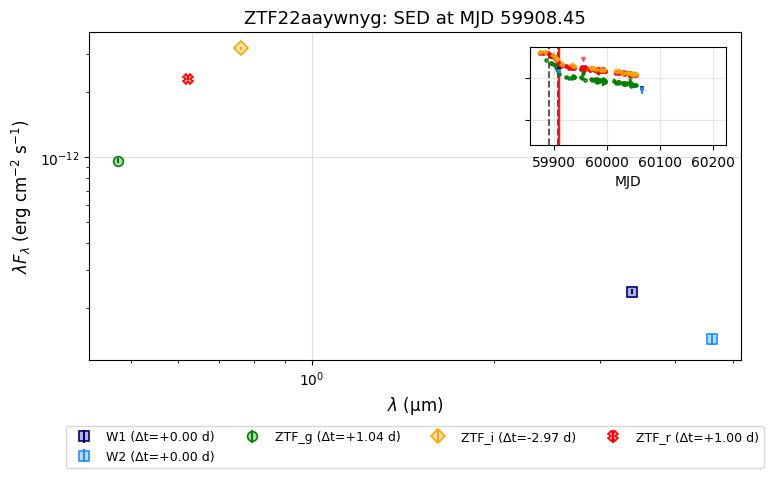

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF22abtspsw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60049.87
  ZTF_g: Δt=-3.68 d
  ZTF_r: Δt=+0.34 d
  W1: Δt=+0.03 d
  W2: Δt=-0.03 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF22abtspsw_cand_sed.png


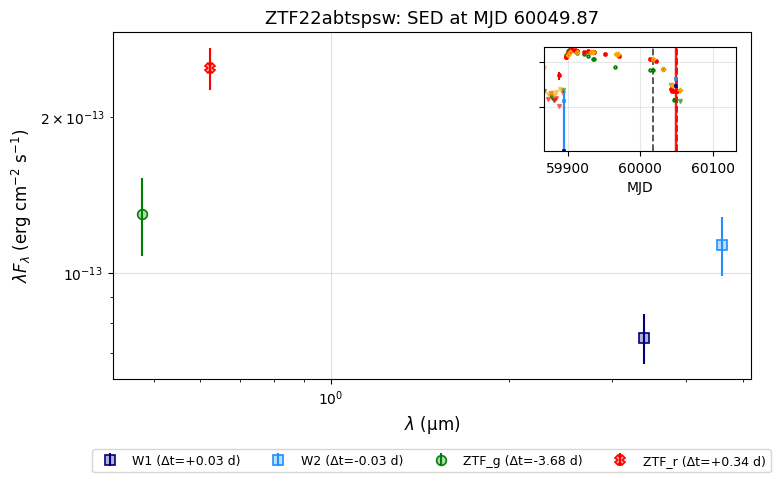

Saved ztf_resdict for ZTF23aanymcl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60177.76
  ZTF_g: Δt=-4.55 d
  ZTF_r: Δt=-4.53 d
  W1: Δt=+1.07 d
  W2: Δt=-1.07 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF23aanymcl_cand_sed.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


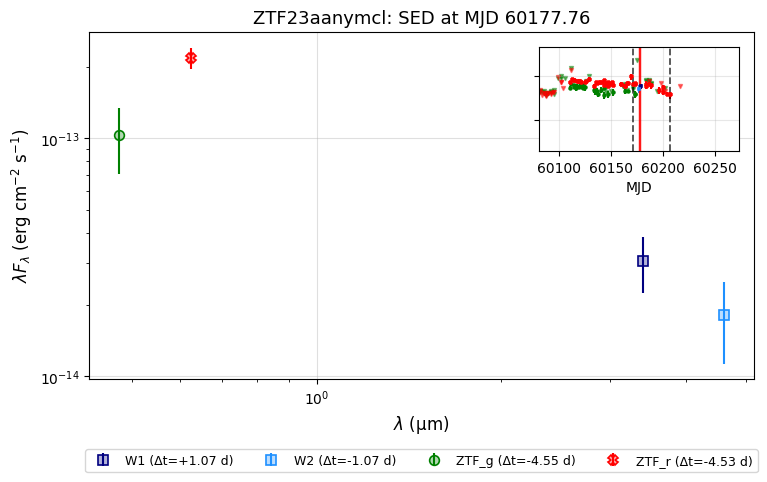

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF23aaxadel to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60294.86
  ZTF_g: Δt=-3.67 d
  ZTF_r: Δt=-3.71 d
  ZTF_i: Δt=+0.29 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF23aaxadel_cand_sed.png


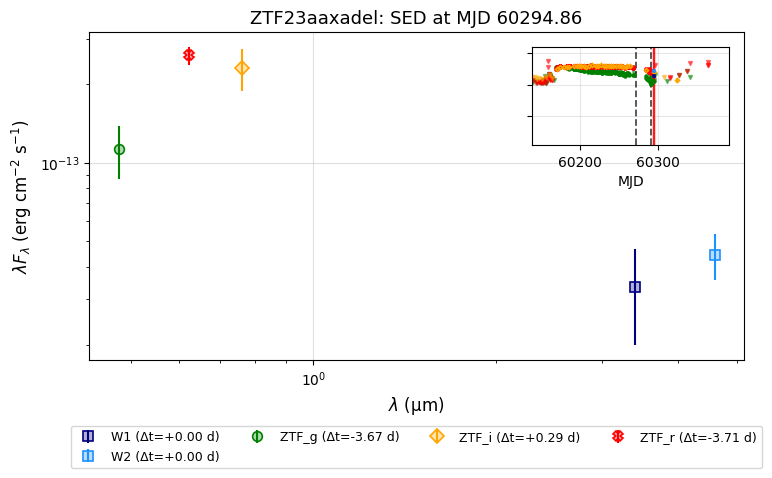

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF23abaxtlq to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60329.67
  ZTF_r: Δt=-3.40 d
  ZTF_i: Δt=-3.43 d
  W1: Δt=+0.00 d
  W2: Δt=-0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF23abaxtlq_cand_sed.png


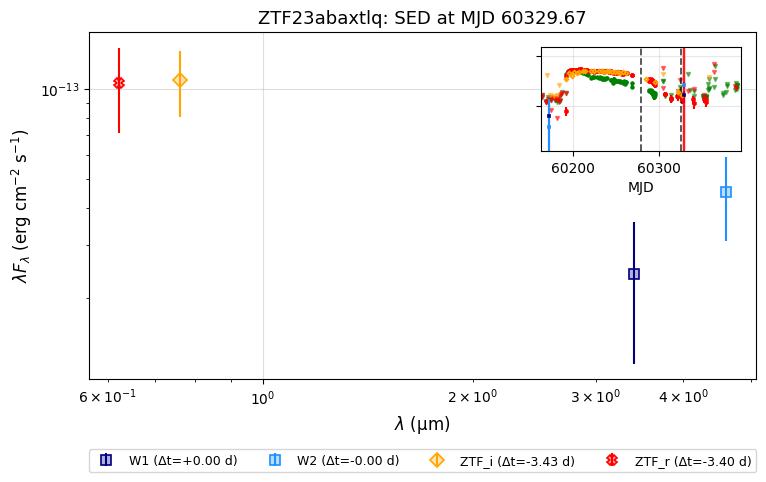

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


Saved ztf_resdict for ZTF23abnogui to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60403.25
  ZTF_g: Δt=+0.10 d
  ZTF_r: Δt=+4.13 d
  ZTF_i: Δt=+1.20 d
  W1: Δt=+1.32 d
  W2: Δt=+1.32 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF23abnogui_cand_sed.png


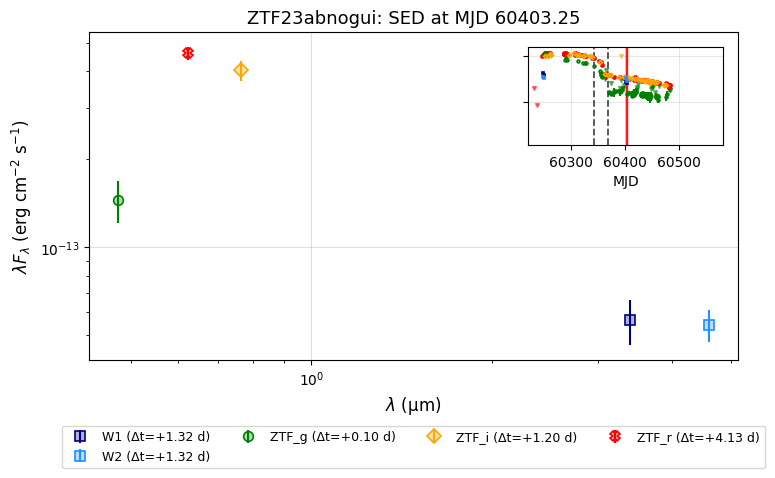

Saved ztf_resdict for ZTF24aaemydm to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60436.33
  ZTF_g: Δt=-2.16 d
  ZTF_i: Δt=+3.88 d
  W1: Δt=+0.00 d
  W2: Δt=+0.00 d
{'ztf_flux': True, 'mode': 'overlay', 'scale_wise': True, 'baseline_ref': 'wise_parity', 'ref_band': 'r', 'logy': True, 'labels': False, 'mark_plateau_end': True, 'mark_tail_start': True}
Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/seds/ZTF24aaemydm_cand_sed.png


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:


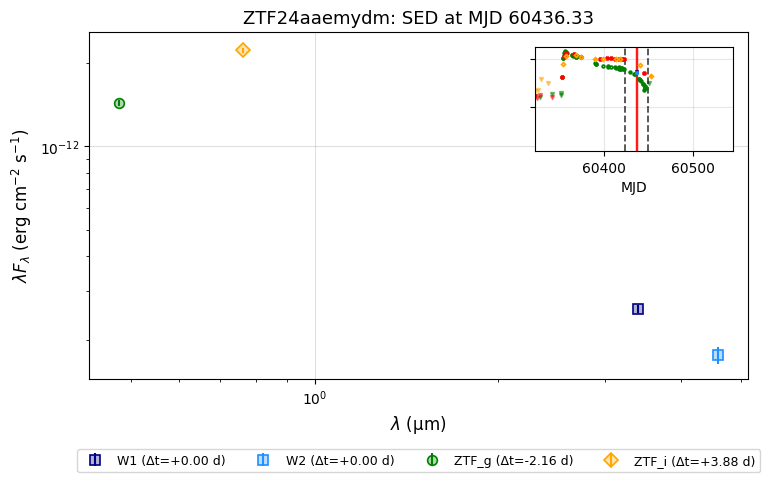

In [20]:
for oid in best_sed_by_oid.keys():
    sed = best_sed_by_oid[oid]
    
    wise_resdict = get_wise_lc_data(oid)
    ztf_resdict = get_ztf_lc_data(oid, alerce, doLC=False, doStamps=False, add_forced=True)
    ztf_resdict = convert_ZTF_mag_mJy(ztf_resdict, forced=True)

    print(f"\nSED at MJD0 = {sed['mjd']:.2f}")
    for b, dt_label in zip(sed["bands"], sed["dt_labels"]):
        print(f"  {b}: {dt_label}")
    plot_sed(
        sed,
        y_mode="Flam",
        logx=True,
        logy=True,
        legend_outside=True,
        inset_lc={
            "ztf_resdict": ztf_resdict,
            "wise_resdict": wise_resdict,
            "oid": oid,
        },
        inset_options={
            "mark_plateau_end": True,
            "mark_tail_start": True,
        },
        savepath=f"/home/cal/analam/Documents/LL_typeIIP/figures/seds/{oid}_cand_sed.png"
    );

## Fitting

/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF18abjndhh to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58434.36


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF18abjndhh_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aadnxnl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58631.44


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF19aadnxnl_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aanrrqu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58629.83


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF19aanrrqu_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aapafit to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58685.57


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF19aapafit_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aarykkb to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 58715.23


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF19aarykkb_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19acbwejj to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59025.65


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF19acbwejj_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF19aclobbu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59072.79


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF19aclobbu_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21aagtqna to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59458.55


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF21aagtqna_cand_gridfit.png
Saved ztf_resdict for ZTF21ablvzhp to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59524.61


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF21ablvzhp_cand_gridfit.png
Saved ztf_resdict for ZTF21abnlhxs to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59541.66


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF21abnlhxs_cand_gridfit.png
Saved ztf_resdict for ZTF21abouuat to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59554.90


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF21abouuat_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF21acpqqgu to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59690.20


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF21acpqqgu_cand_gridfit.png
Saved ztf_resdict for ZTF22aativsd to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59910.55


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF22aativsd_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22aaywnyg to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 59908.45


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF22aaywnyg_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF22abtspsw to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60049.87


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF22abtspsw_cand_gridfit.png
Saved ztf_resdict for ZTF23aanymcl to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60177.76


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF23aanymcl_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23aaxadel to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60294.86


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF23aaxadel_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23abaxtlq to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60329.67


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF23abaxtlq_cand_gridfit.png


/home/cal/analam/Documents/LL_typeIIP/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saved ztf_resdict for ZTF23abnogui to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60403.25


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF23abnogui_cand_gridfit.png
Saved ztf_resdict for ZTF24aaemydm to /home/cal/analam/Documents/LL_typeIIP/data/ztf_alerce

SED at MJD0 = 60436.33


/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/scaling.py:198: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df._models = model_map
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:651: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.errorbar(
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/photometry/plotting.py:198: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  # Find first detection with a valid stamp
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/sed/plotting.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  for line in ax.lines:
/home/cal/analam/Documents/LL_typeIIP/src/lltypeiip/dusty/plotting.

Saved plot to /home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/ZTF24aaemydm_cand_gridfit.png


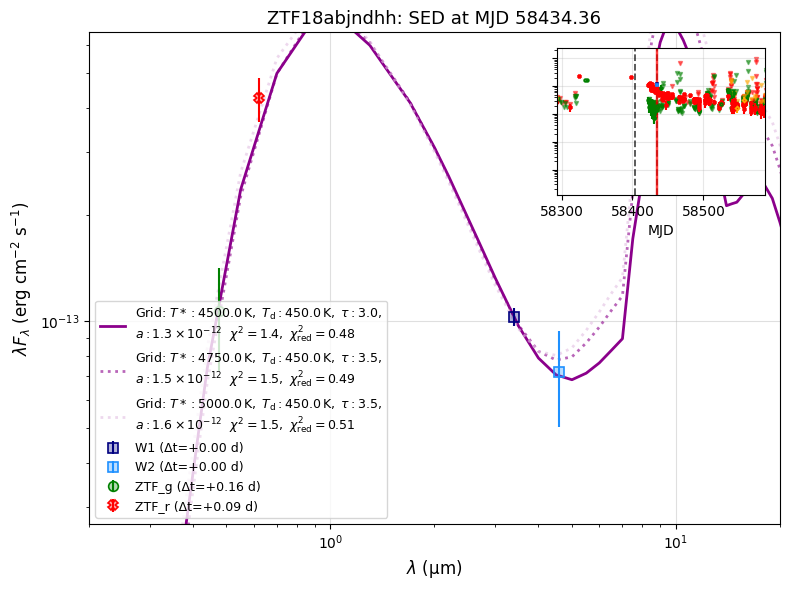

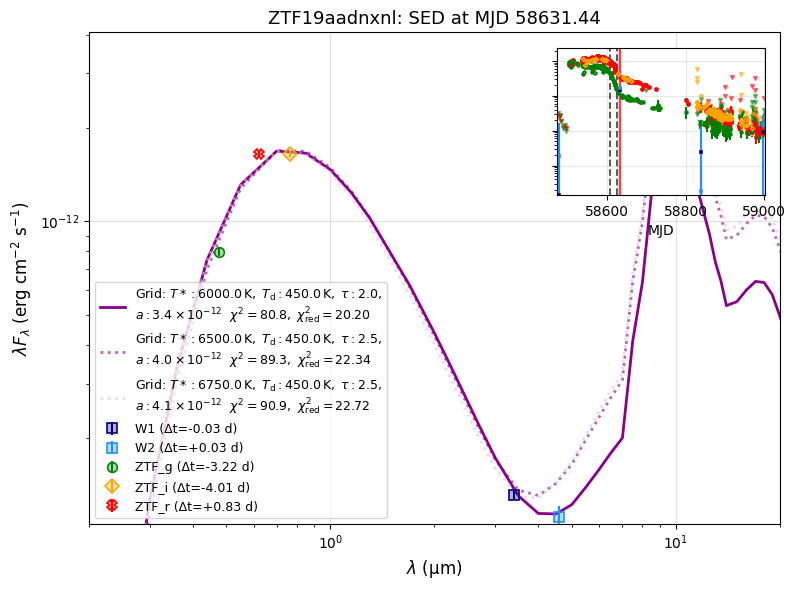

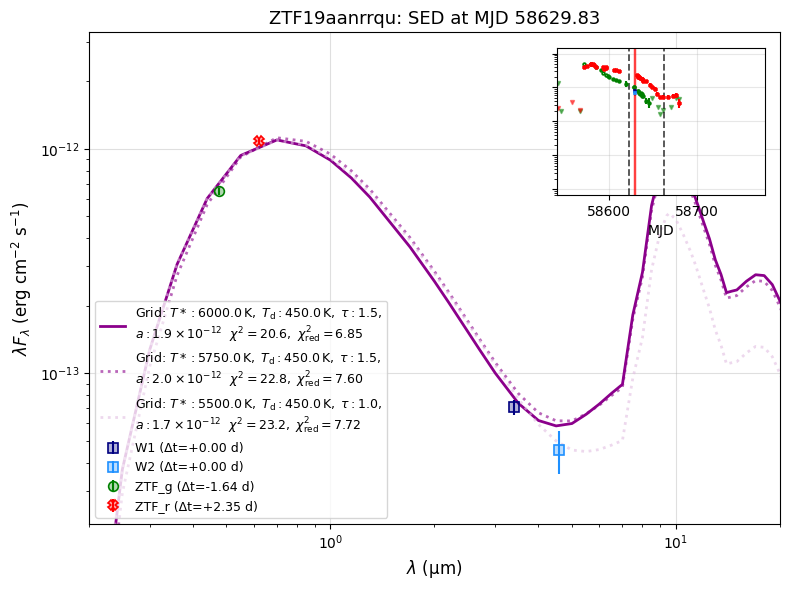

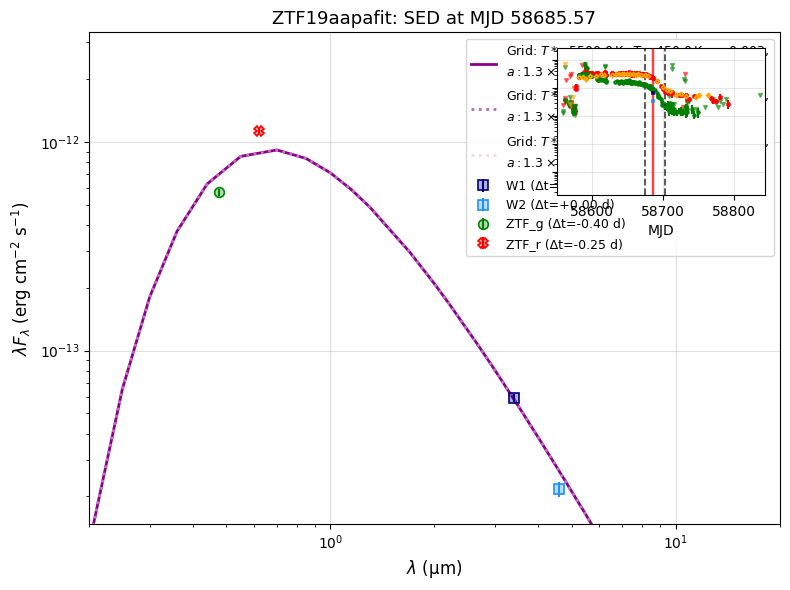

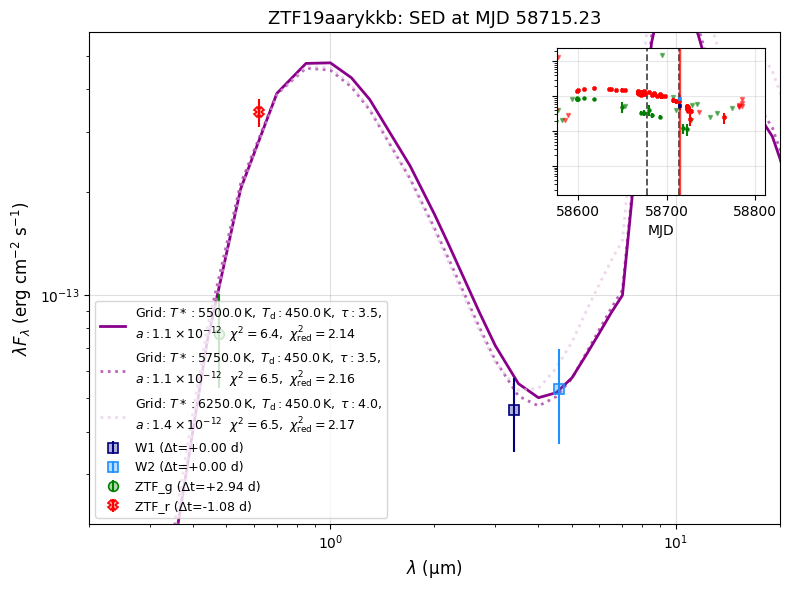

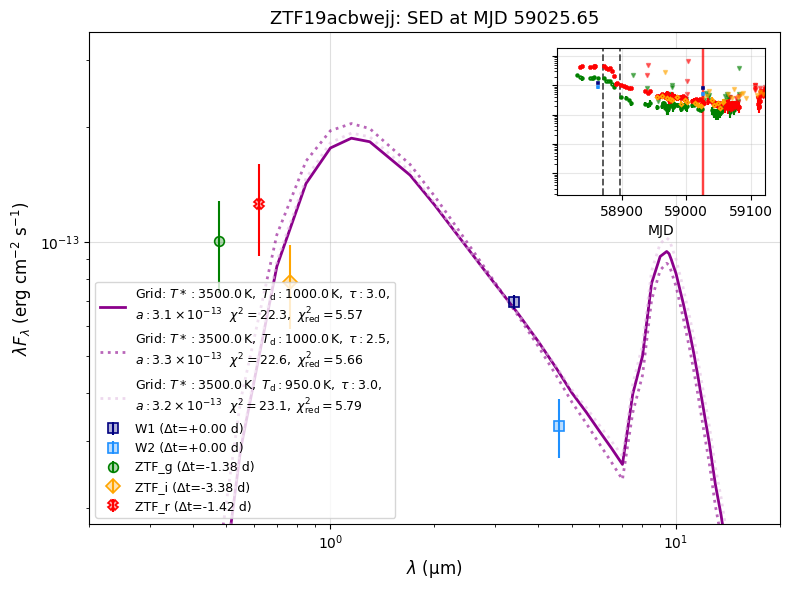

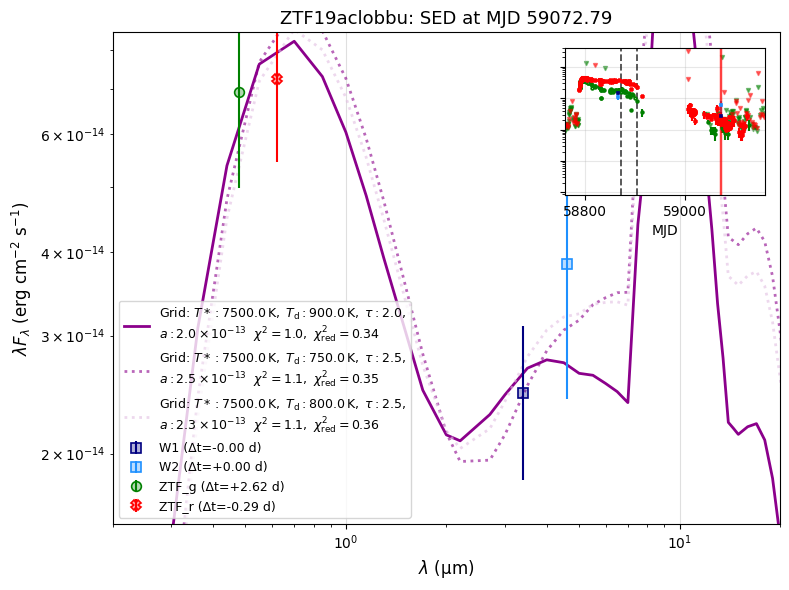

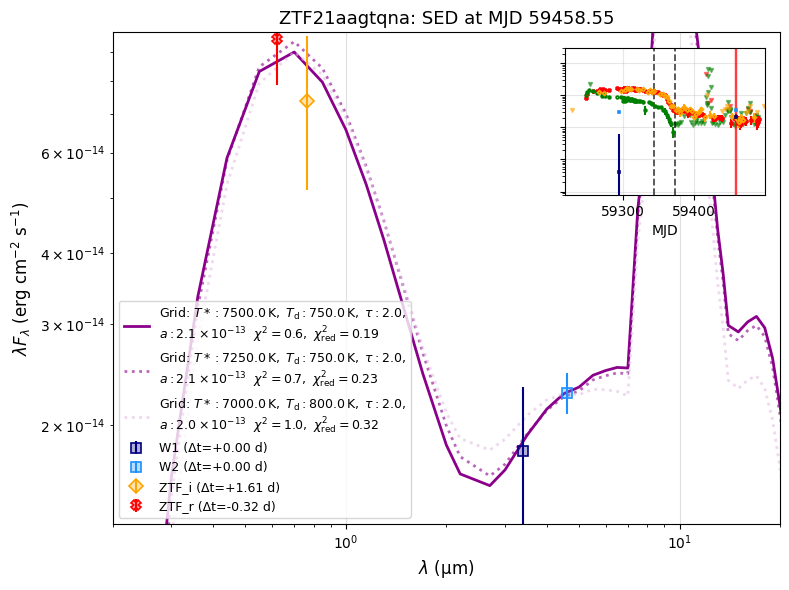

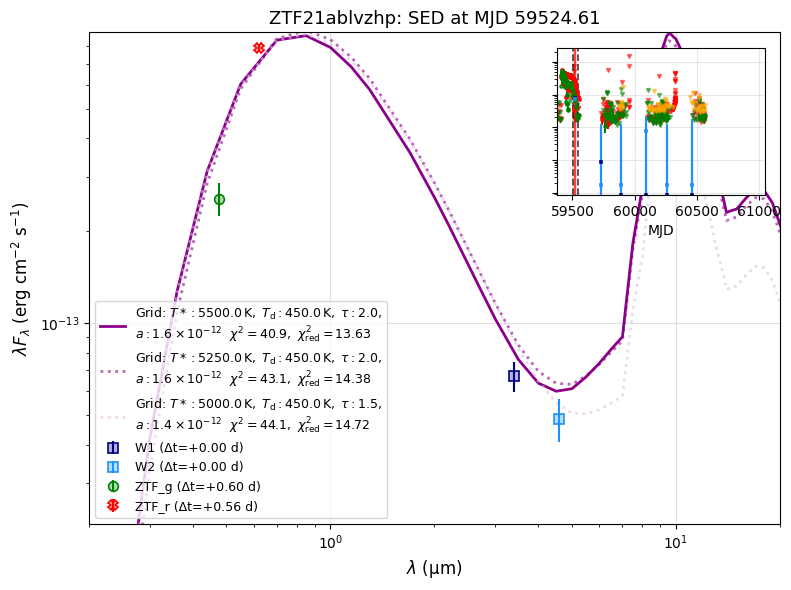

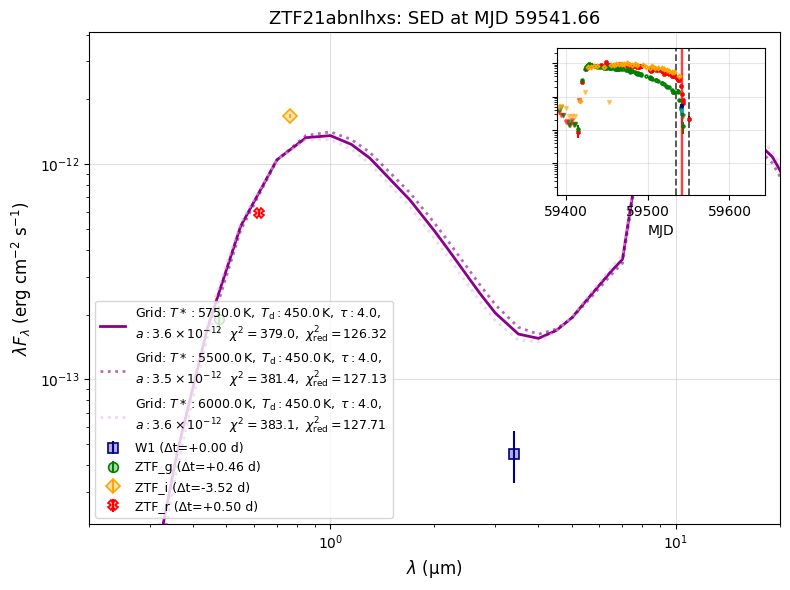

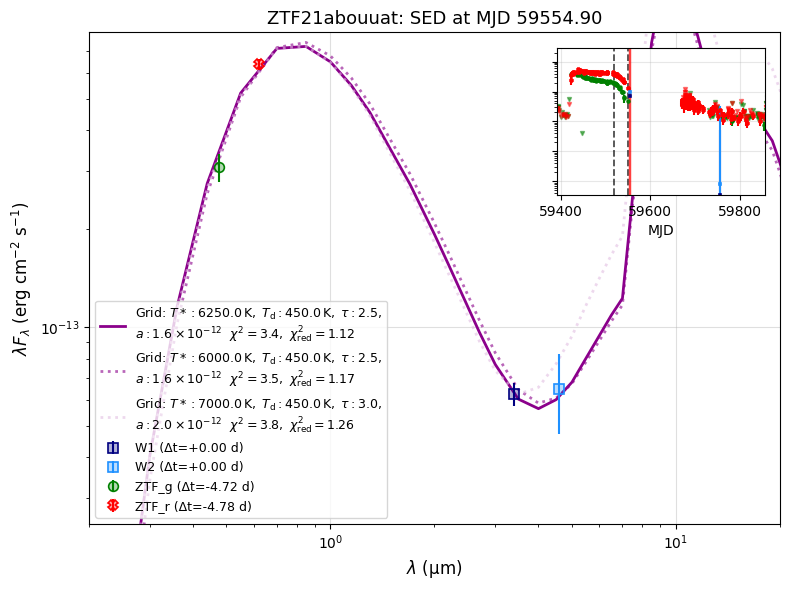

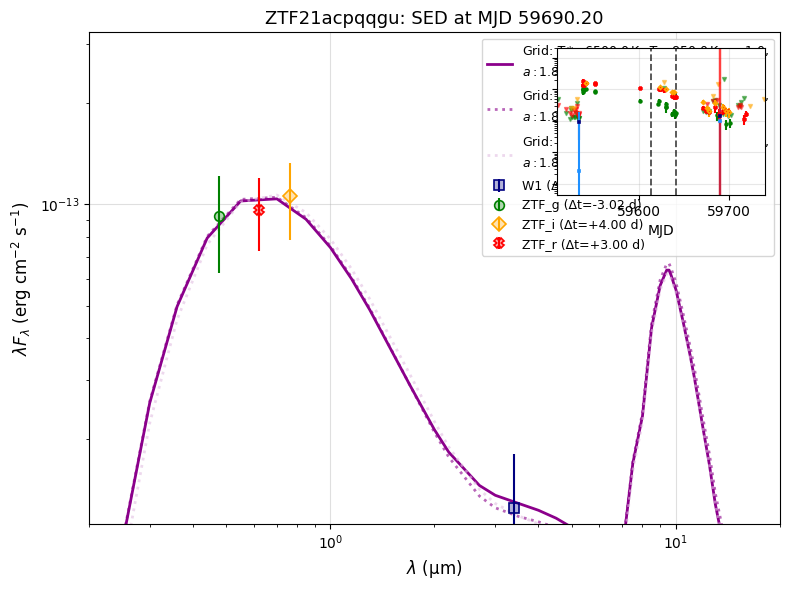

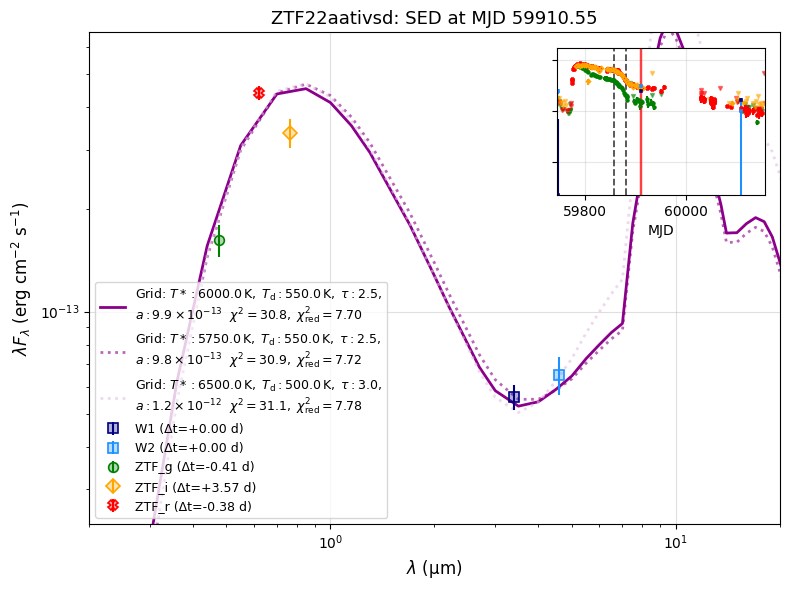

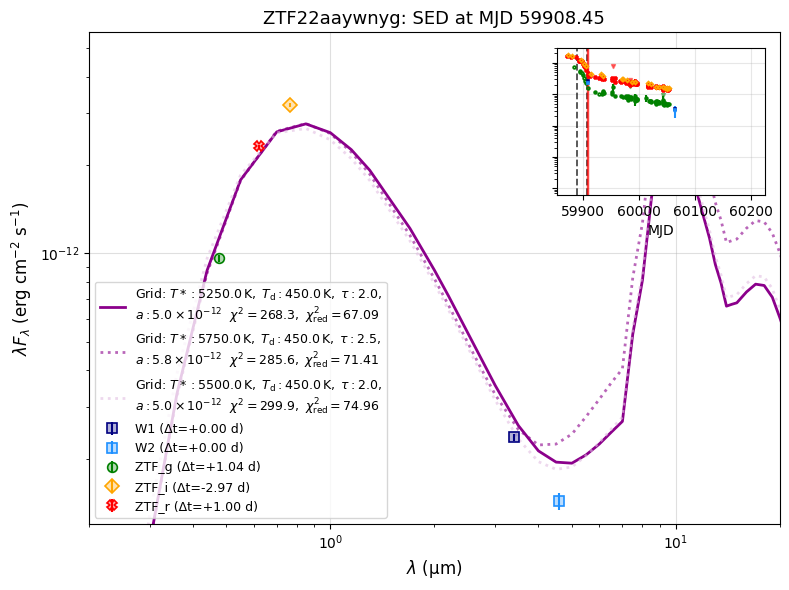

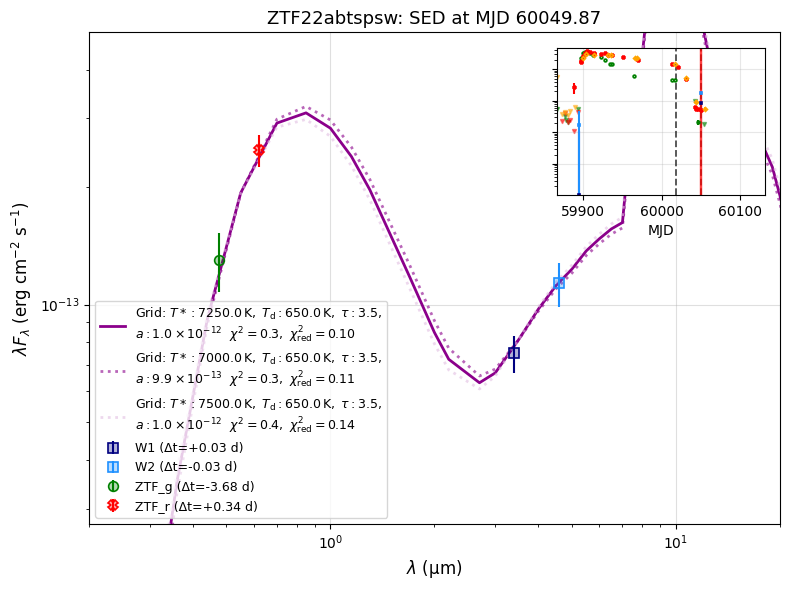

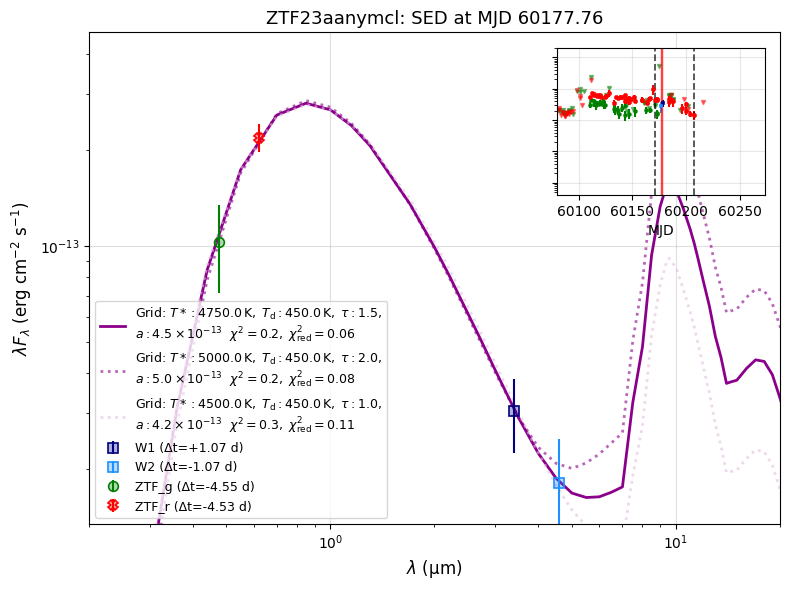

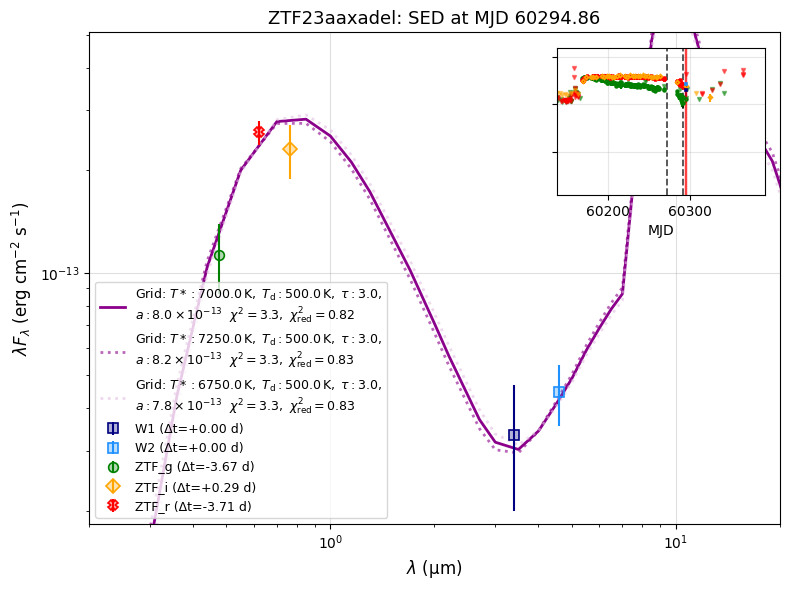

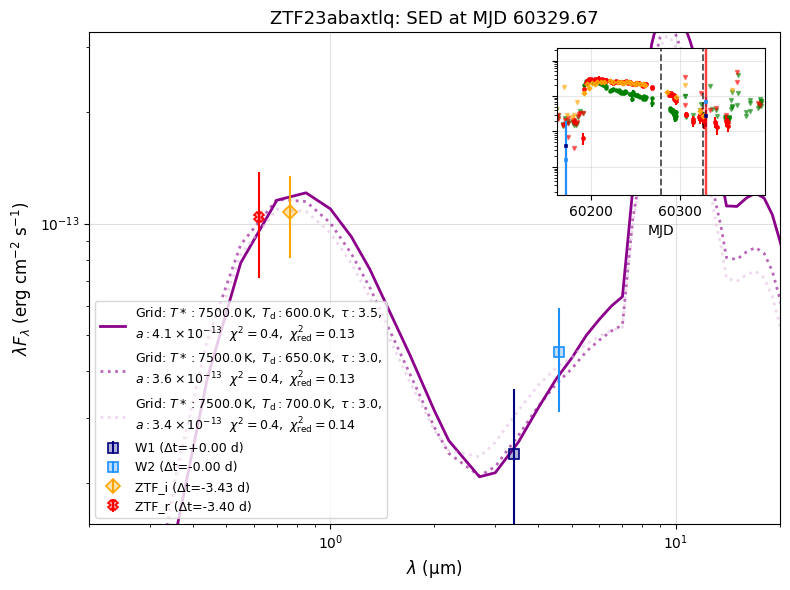

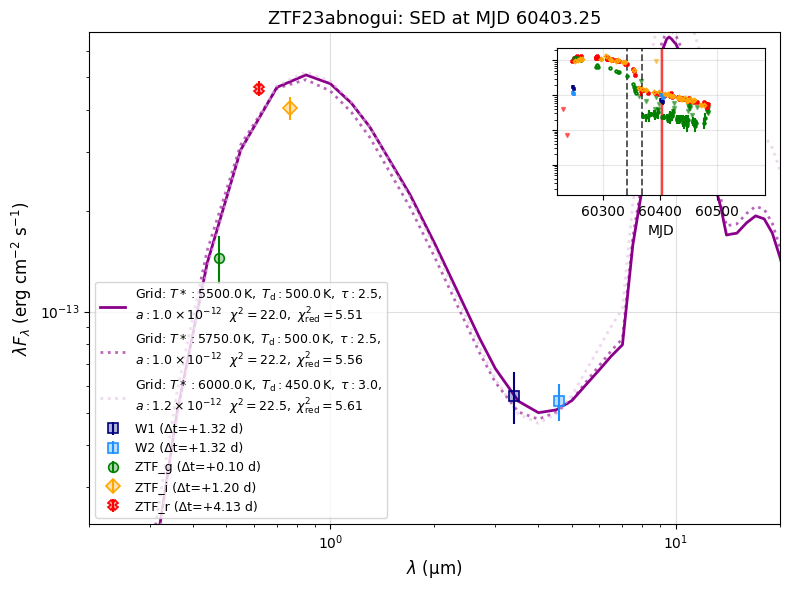

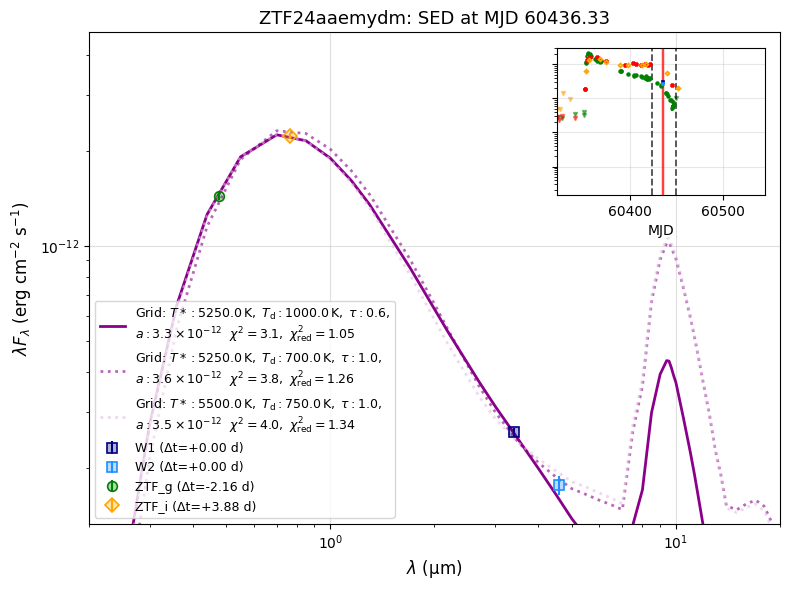

In [24]:
grid_dir = config.paths.dusty_grid_dir

for oid in best_sed_by_oid.keys():
    sed = best_sed_by_oid[oid]
    
    wise_resdict = get_wise_lc_data(oid)
    ztf_resdict = get_ztf_lc_data(oid, alerce, doLC=False, doStamps=False, add_forced=True)
    ztf_resdict = convert_ZTF_mag_mJy(ztf_resdict, forced=True)

    print(f"\nSED at MJD0 = {sed['mjd']:.2f}")

    df = fit_grid_to_sed(grid_dir, sed, y_mode="Flam", use_weights=True)
    plot_best_fit_dusty_model(sed, df, y_mode="Flam", top_n=3, keep_sed_limits=True, inset_lc=True, 
                              ztf_resdict=ztf_resdict, wise_resdict=wise_resdict, savepath=f"/home/cal/analam/Documents/LL_typeIIP/figures/grid_fits/{oid}_cand_gridfit.png")

In [26]:
oid_w_good_seds = list(best_sed_by_oid.keys())

outpath = "/home/cal/analam/Documents/LL_typeIIP/sed_sample.txt"

with open(outpath, "w") as f:
    for oid in oid_w_good_seds:
        f.write(f"{oid}\n")

print(f"Saved {len(oid_w_good_seds)} OIDs to {outpath}")

Saved 20 OIDs to /home/cal/analam/Documents/LL_typeIIP/sed_sample.txt


## Test MCMC fit for specific OID

In [ ]:
oid = "ZTF19aadnxnl"
outdir = Path(config.paths.mcmc_results_dir) / oid
data_npz = np.load(outdir / f"mcmc_{oid}_data.npz", allow_pickle=True)

def q16_50_84(x):
    q = np.quantile(x, [0.16, 0.5, 0.84])
    return q[1], q[0], q[2]  # median, low, high

files = {
    "data": outdir / f"mcmc_{oid}_data.npz",
    "anchored": outdir / f"mcmc_{oid}_anchored.npz",
    "mixture": outdir / f"mcmc_{oid}_mixture.npz",}

params = ["tstar", "tdust", "tau", "a"]

print("Mode      logP_med   tstar_med    tdust_med     tau_med       a_med       N_samples")
print("-"*80)
for mode, fp in files.items():
    d = np.load(fp, allow_pickle=True)
    logp_med = np.median(d["log_prob"])
    meds = [q16_50_84(d[p])[0] for p in params]
    print(f"{mode:8s}  {logp_med:9.2f}  " + "  ".join(f"{m:10.3g}" for m in meds) + f"{len(d['log_prob']):12d}")
    logp = d["log_prob"]
print(" ")

for mode, fp in files.items():
    d = np.load(fp, allow_pickle=True)
    chi2_med = -2.0 * np.median(d["log_prob"])
    print(mode, "chi2_median ~", chi2_med)

Mode      logP_med   tstar_med    tdust_med     tau_med       a_med       N_samples
--------------------------------------------------------------------------------
data          -2.05    1.08e+04         285        4.73    1.79e-11      160000


FileNotFoundError: [Errno 2] No such file or directory: '/home/cal/analam/Documents/LL_typeIIP/mcmc_results/ZTF19aadnxnl/mcmc_ZTF19aadnxnl_anochored.npz'

In [ ]:

for mode, fp in files.items():
    d = np.load(fp, allow_pickle=True)

    logp = d["log_prob"]
    af = d["acceptance_fraction"]

    print(f"\nMode: {mode}")
    print(f"logP: max={logp.max():.2f}, median={np.median(logp):.2f}")
    print(f"chi2_median ≈ {-2*np.median(logp):.1f}")
    print(f"acceptance: median={np.median(af):.3f}, min={af.min():.3f}, max={af.max():.3f}")

    if d["autocorr_time"] is not None:
        tau = np.asarray(d["autocorr_time"])
        print(f"autocorr time: {tau}")
        print(f"steps / max(tau): {d['chain'].shape[0] / tau.max():.1f}")


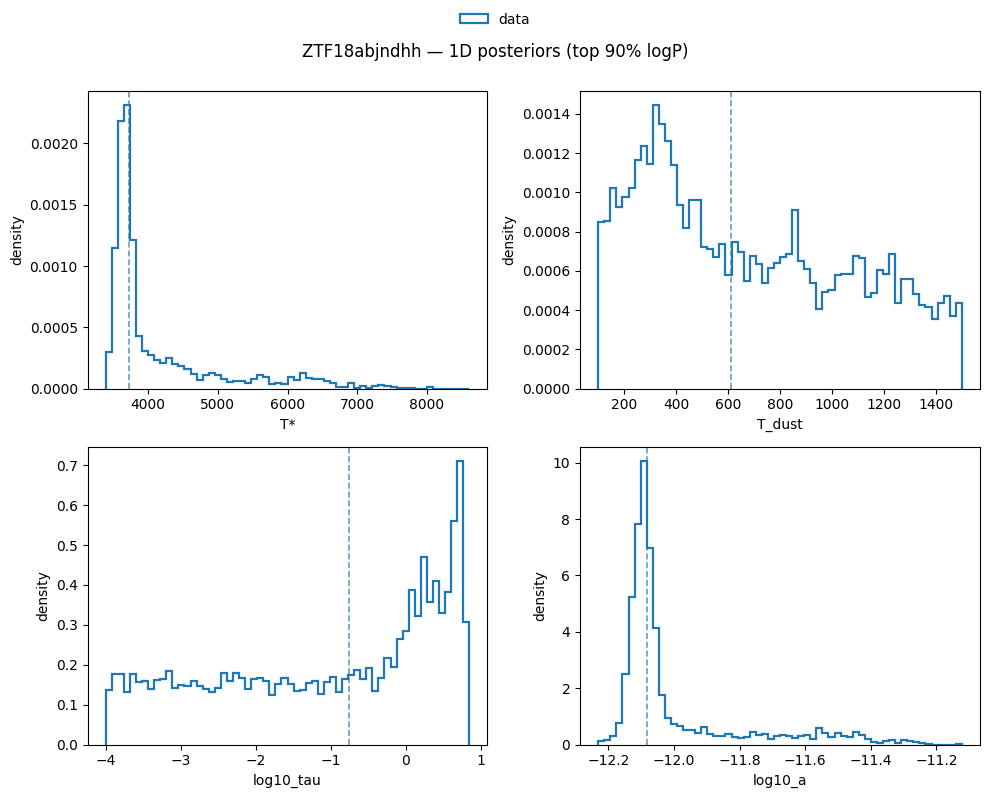

In [7]:
def top_quantile_samples(npz, keep_frac=0.9, max_points=30000, seed=0):
    s  = npz["samples"]
    lp = npz["log_prob"]
    m = np.isfinite(lp)
    s, lp = s[m], lp[m]

    cut = np.quantile(lp, 1.0 - keep_frac) 
    s = s[lp >= cut]

    if len(s) > max_points:
        rng = np.random.default_rng(seed)
        idx = rng.choice(len(s), size=max_points, replace=False)
        s = s[idx]
    return s

keep_frac = .9

S = {
    "data":    top_quantile_samples(data_npz, keep_frac=keep_frac),
}

param_names = ["T*", "T_dust", "log10_tau", "log10_a"]
modes = ["data"]
colors = {"data": "tab:blue", "anchored": "tab:orange", "mixture": "tab:green"}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.ravel()

for j, ax in enumerate(axes):
    for mode in modes:
        x = S[mode][:, j]
        ax.hist(x, bins=60, density=True, histtype="step",
                label=mode, color=colors[mode], linewidth=1.6)
        ax.axvline(np.median(x), ls="--", alpha=0.7, color=colors[mode], linewidth=1.2)

    ax.set_xlabel(param_names[j])
    ax.set_ylabel("density")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=False)

fig.suptitle(f"{oid} — 1D posteriors (top {int(keep_frac*100)}% logP)", y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [8]:
samples = data_npz["samples"]
logp = data_npz["log_prob"]

m = np.isfinite(logp)
samples = samples[m]
logp = logp[m]

keep_frac = 0.90   # try 0.90 or 0.95
cut = np.quantile(logp, 1.0 - keep_frac)
samples_core = samples[logp >= cut]

samples = samples_core
fig = corner.corner(
    samples,
    labels=[r"$T_*$ (K)", r"$T_\mathrm{dust}$ (K)", r"$\log_{10}\tau$", r"$\log_{10} a$"],
    quantiles=[0.16, 0.5, 0.84],
    show_titles=True,
    title_kwargs={"fontsize": 12},
    # bins=50,
    # smooth=0.3,
    # smooth1d=0.3,
)

NameError: name 'corner' is not defined